In [17]:
from local_search import local_search_greedy
from ILS2 import ILS2a
from random_cycles import gen_random_cycles
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import pickle
from calc import calculate_metrics
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
FILENAMES = ["kroB200.tsp"]
ILS2a_TIME = 250
CYCLES_SET_SIZE = 1000

for filename in FILENAMES:
    print(f"Obliczenia dla pliku {filename}")
    data = read_data_file("data/" + filename)
    dist_matrix = calculate_distance_matrix(data)

    pickle_file = 'cycles_' + filename + '.pkl'

    if os.path.exists(pickle_file):
        pass
    else:
        cycles = []
        for _ in tqdm(range(CYCLES_SET_SIZE)):
            cycle1, cycle2 = gen_random_cycles(data=data)
            cycle1_gr, cycle2_gr = local_search_greedy(cycle1, cycle2, dist_matrix, data)
            cycles.append((cycle1_gr, cycle2_gr))

        cycles = np.array(cycles)
        print("Cykle wygenerowane i zapisane do pliku pickle")

        with open(pickle_file, 'wb') as f:
            pickle.dump(cycles, f)


    pickle_file = 'best_cycles_' + filename + '.pkl'

    if os.path.exists(pickle_file):
        pass
    else:
        print("Uruchamiam ILS2a")
        best_cycles = ILS2a(dist_matrix, data, ILS2a_TIME)
        print("Najlepsze cykle wygenerowane i zapisane do pliku pickle")

        with open(pickle_file, 'wb') as f:
            pickle.dump(best_cycles, f)

Obliczenia dla pliku kroB200.tsp


In [19]:
import pprint as pp

In [20]:
for filename in FILENAMES:
    pickle_file = 'best_cycles_' + filename + '.pkl'
    with open(pickle_file, 'rb') as f:
        best_cycles = pickle.load(f)
        print(f"Najlepsze cykle załadowane z pliku {pickle_file}")
    pickle_file = 'cycles_' + filename + '.pkl'
    with open(pickle_file, 'rb') as f:
        cycles = pickle.load(f)
        print(f"Cykle załadowane z pliku {pickle_file}")

    data = []

    for i in tqdm(range(cycles.shape[0])):
        data.append(calculate_metrics(cycles[i], best_cycles, cycles, dist_matrix))

    df = pd.DataFrame(data)
    df.to_csv(filename + '.csv', index=False)

Najlepsze cykle załadowane z pliku best_cycles_kroB200.tsp.pkl
Cykle załadowane z pliku cycles_kroB200.tsp.pkl


100%|██████████| 1000/1000 [05:03<00:00,  3.30it/s]


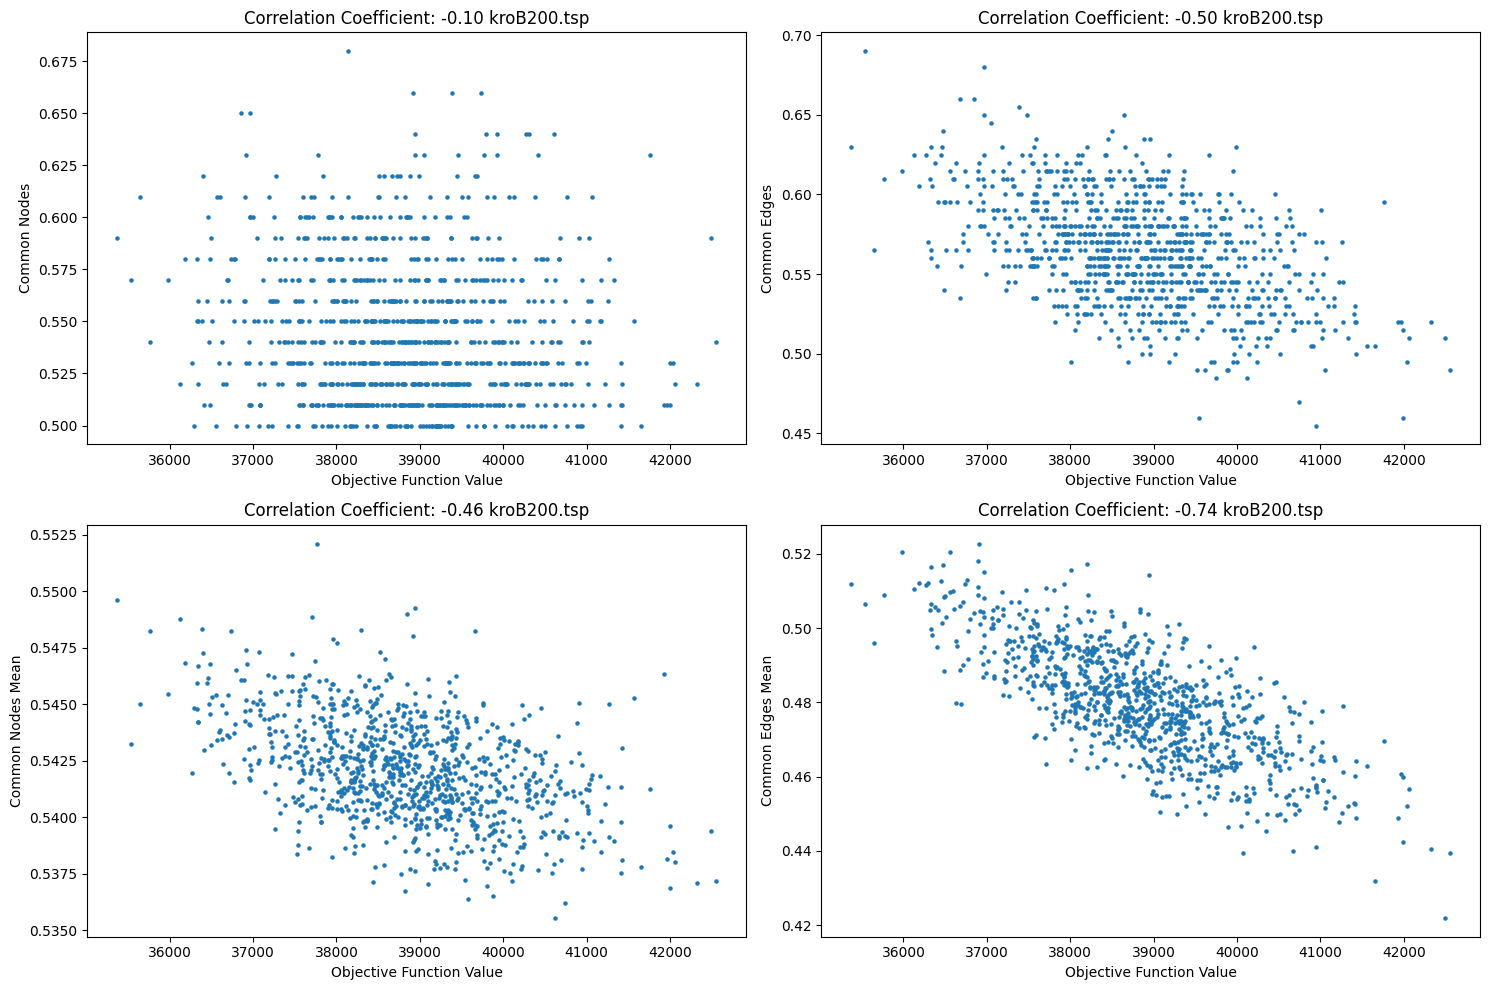

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define pairs of columns to plot
plot_pairs = [
    ('length', 'common_nodes'),
    ('length', 'common_edges'),
    ('length', 'common_nodes_mean'),
    ('length', 'common_edges_mean')
]

for filename in FILENAMES:
    # Load the data from the current file
    df = pd.read_csv(filename + '.csv')

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    for i, (x_col, y_col) in enumerate(plot_pairs):
        ax = axs[i//2, i%2]
        x = df[x_col]
        y = df[y_col]
        correlation_coefficient = np.corrcoef(x, y)[0, 1]
        ax.scatter(x, y, s=5)
        ax.set_xlabel('Objective Function Value')
        ax.set_ylabel(y_col.replace('_', ' ').title())
        ax.set_title(f'Correlation Coefficient: {correlation_coefficient:.2f} {filename}')

 

    plt.tight_layout()
    plt.show()

Najlepsze cykle załadowane z pliku best_cycles_kroB200.tsp.pkl


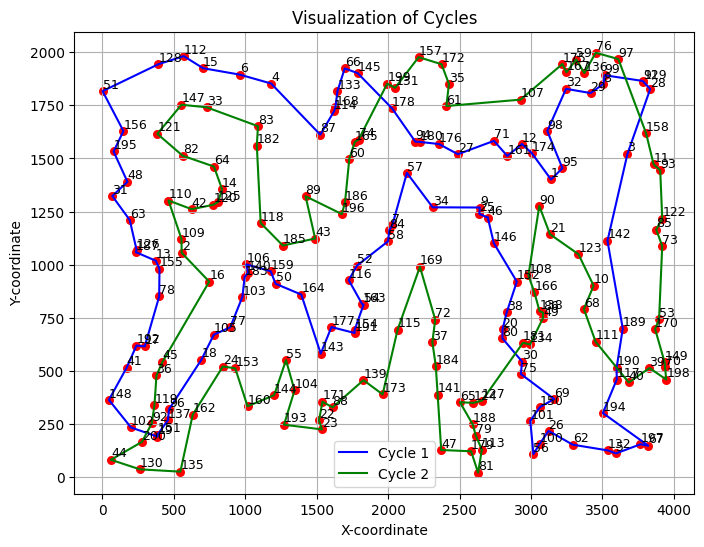

In [22]:
for filename in FILENAMES:
    pickle_file = 'best_cycles_' + filename + '.pkl'
    with open(pickle_file, 'rb') as f:
        best_cycles = pickle.load(f)
        print(f"Najlepsze cykle załadowane z pliku {pickle_file}")

    data = read_data_file("data/" + filename)
    plot_cycles(*best_cycles, data)